# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Eza adila]
- **Email:** [climbingboys01@gmail.com]
- **ID Dicoding:** [MS127D5Y0553]

## Menentukan Pertanyaan Bisnis

- Apakah ada hubungan antara kondisi cuaca dan tingkat penggunaan sepeda?
	- Tujuan: Mengetahui bagaimana faktor cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah penyewaan sepeda.
	- Manfaat: Dapat digunakan untuk prediksi permintaan sepeda pada kondisi cuaca tertentu.
- Bagaimana pola penggunaan sepeda berdasarkan hari?
	- Tujuan: Mengidentifikasi tren penggunaan sepeda sepanjang hari, hari dalam seminggu, dan musim dalam setahun.
	- Manfaat: Dapat membantu dalam pengelolaan stok sepeda di berbagai waktu dan musim.


## Import Semua Packages/Library yang Digunakan

In [123]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [124]:
df_day = pd.read_csv('Data/data_1.csv')

df_hour = pd.read_csv('Data/data_2.csv')

**Insight:**
- membaca dataset hari pada data_1.csv
- membaca dataset jam pada data_2.csv

### Assessing Data

In [125]:
# Menggabungkan ke-2 data
df_day.head(5)
df_day.info()

df_hour.head(5)
df_hour.info()

df_merged = pd.merge(df_hour, df_day, on='dteday', suffixes=('_hour', '_day'))

# Cek missing values
print("Missing Values in data:")
print(df_merged.isna().sum())

# Cek duplikasi
print("\nJumlah duplikasi pada data", df_merged.duplicated().sum())

# Cek menggunkan parameter statik
print("\nInfo data")
df_merged.head(5)
df_merged.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- menganalisis kesalahan pada data dengan melakukan
- info dataset
- mengecek missing value
- mengecek duplikasi

### Cleaning Data

**Insight:**
- setelah melakukan proses assessing saya tidak menemukan masalah pada data sehinggan proses cleaning tidak di perlukan


## Exploratory Data Analysis (EDA)

### Explore ...

In [126]:
df_merged.describe()


,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Mengecek ulang data yang sudah kita analisis sebelumnya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

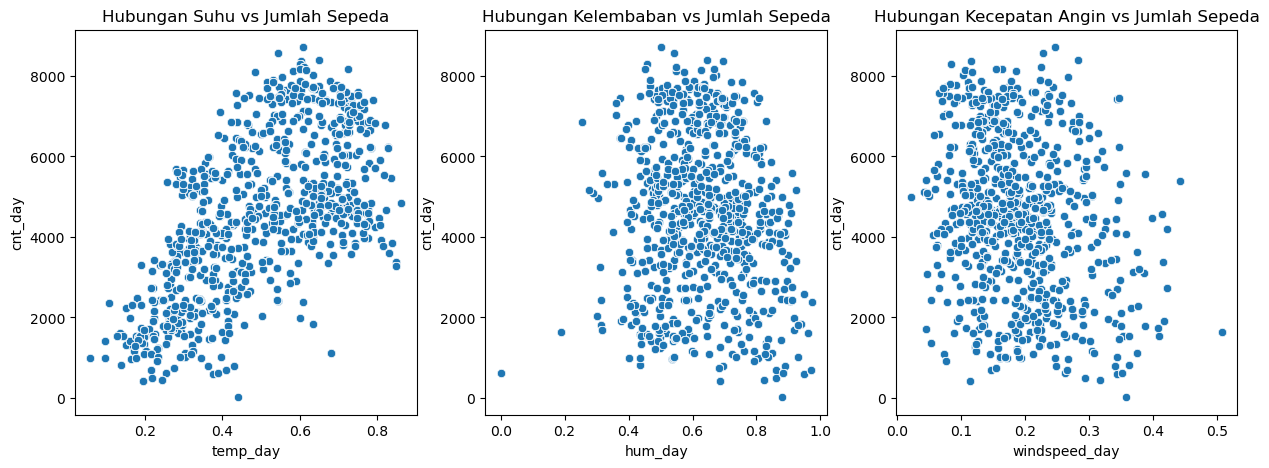

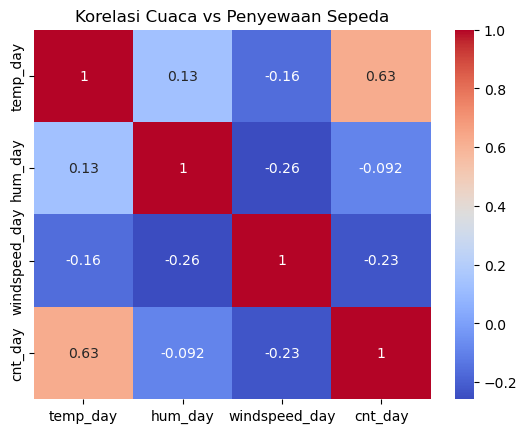

In [ ]:
# pertanyaan 1

plt.figure(figsize=(15, 5))

# suhu vs jumlah penyewa speda
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_merged['temp_day'], y=df_merged['cnt_day'])
plt.title('Hubungan Suhu vs Jumlah Sepeda')

# kelembaban vs jumlah penyewa speda
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_merged['hum_day'], y=df_merged['cnt_day'])
plt.title('Hubungan Kelembaban vs Jumlah Sepeda')

# kecepatan angin vs jumlah penyewa speda
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_merged['windspeed_day'], y=df_merged['cnt_day'])
plt.title('Hubungan Kecepatan Angin vs Jumlah Sepeda')

plt.show()

correlation_matrix = df_merged[['temp_day', 'hum_day', 'windspeed_day', 'cnt_day']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Cuaca vs Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

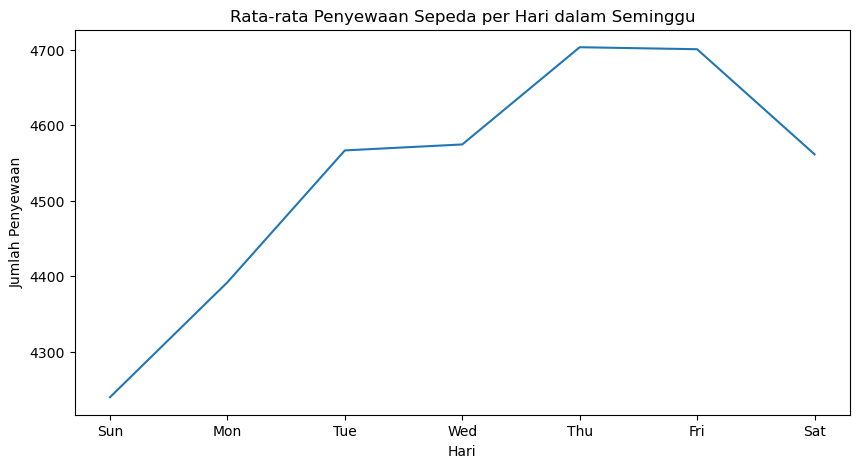

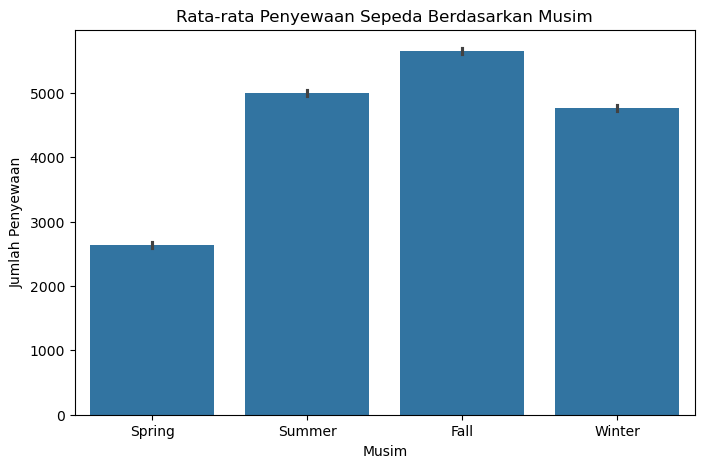

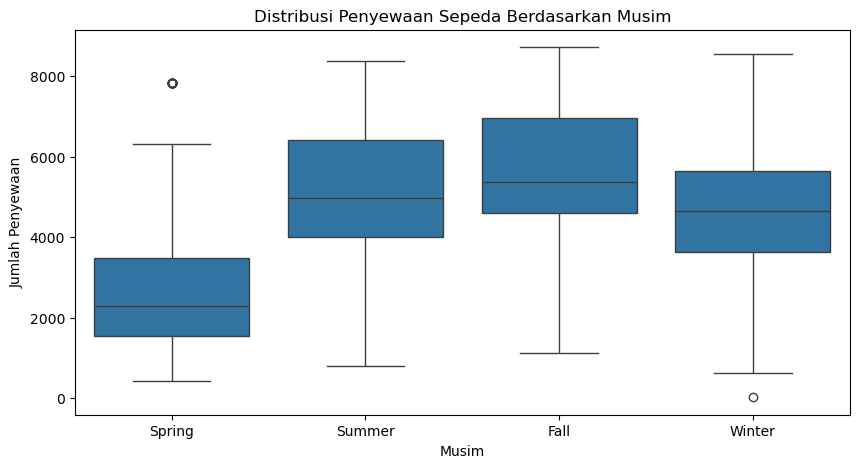

In [128]:
# pertanyaan 2
# line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_merged['weekday_day'], y=df_merged['cnt_day'], estimator='mean', errorbar=None)
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title('Rata-rata Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=df_merged['season_hour'], y=df_merged['cnt_day'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_merged['season_hour'], y=df_merged['cnt_day'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
-  Menganalisi hubungan antara kondisi cuaca dan tingkat penggunaan speda
- Menganalisi pola penggunaan speda berdasarkan hari

## Analisis Lanjutan (Opsional)

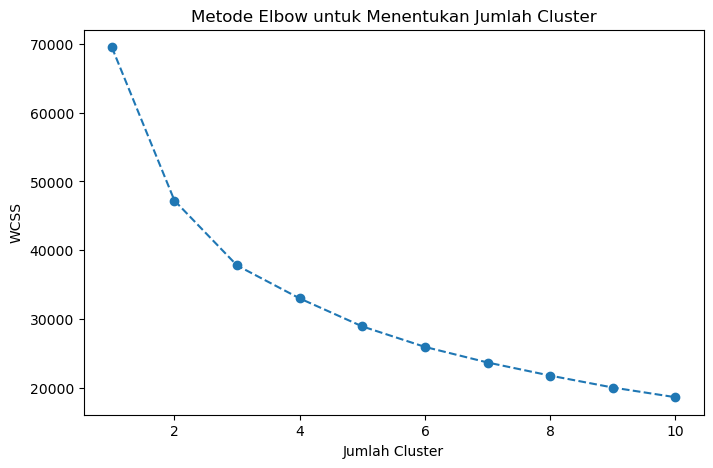

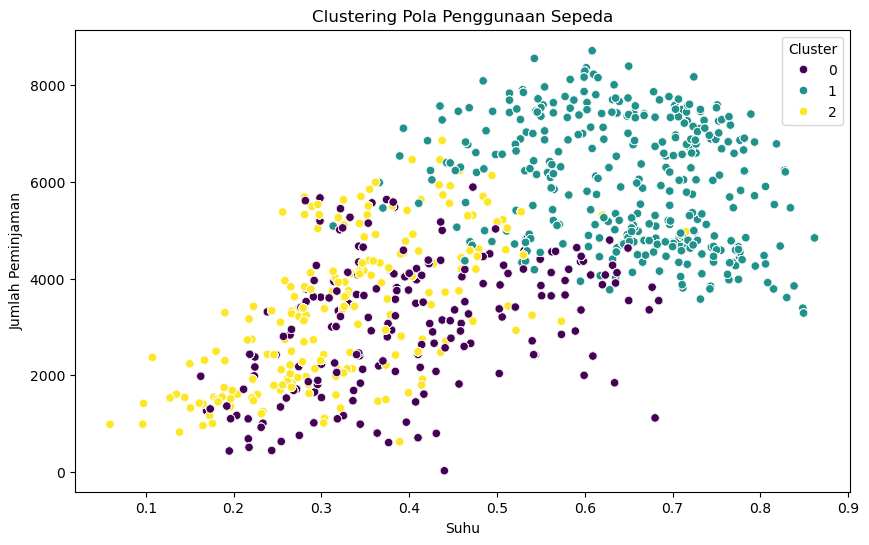

In [ ]:
features = ['temp_day', 'hum_day', 'windspeed_day', 'cnt_day']
data = df_merged[features]

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah cluster
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

# Menjalankan K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_merged['cluster'] = kmeans.fit_predict(data_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_merged['temp_day'], y=df_merged['cnt_day'], hue=df_merged['cluster'], palette='viridis')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.title('Clustering Pola Penggunaan Sepeda')
plt.legend(title='Cluster')
plt.show()

## Conclusion

- Conclution pertanyaan 1
	- Suhu adalah faktor terpenting dalam peningkatan jumlah sewa sepeda
	- Kelembaban dan kecepatan angin memiliki dampak yang kecil
- Conclution pertanyaan 2
	- penyewaan sepeda meningkat dari hari minggu hingga jumat lalu turun di hari sabtu dan minggu
	- penyewaan sepeda terbanyak terjadi pada musim gugur dan di posisi ke-2 oleh musim panas. 